Lectura de archivos y carga de datos

In [269]:
!git clone https://github.com/ichiP245/micrography-imgpro.git

fatal: destination path 'micrography-imgpro' already exists and is not an empty directory.


In [270]:
import sys
sys.path.append('/content/micrography-imgpro')

# Verifica que el módulo esté en la ruta antes de intentar importarlo
print("Python path updated. Trying to import getmeresults...")

Python path updated. Trying to import getmeresults...


In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [330]:
!pip install scikit_posthocs

In [272]:
df0 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results24.csv', index_col=0)
df1 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results25simil26.csv', index_col=0)
df2 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results25cercano.csv', index_col=0)

In [273]:
# Chequeamos que las columnas estan en el orden correcto
pd.concat([pd.DataFrame(df0.columns).T, pd.DataFrame(df1.columns).T, pd.DataFrame(df2.columns).T])

,0,1,2,3,4,5,6
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda


## Agregamos las escalas

In [274]:
def limpieza_txt_escala(path_txt):
  df_escala = pd.read_csv(path_txt,header=None)
  df_escala = df_escala.drop(columns=1)
  df_escala = df_escala[0].str.split(':',expand=True)
  df_escala = df_escala.rename(columns={0:'Experimento',1:'Escala (micrones)'})
  for col in df_escala.columns:
    df_escala[col] = df_escala[col].str.strip()
  return df_escala

In [275]:
def limpieza_col_experimento(df_escala):
  df_escala['Experimento bis'] = df_escala['Experimento']
  for i in range(len(df_escala)):
    if i==0:
      elem_anterior=df_escala.iloc[i,0]    # Esto lo puedo hacer por posicion porque estoy seguro que 'Experimento' es la columna 0
    else:
      if len(df_escala.iloc[i,0])==2:      # El len del elemento es 2 cuando no tiene el numero de experimento adelante (o sea ya hubo un registro anterior ingresado con el numero de experimento)
        df_escala.iloc[i,0] = elem_anterior[:-2]+df_escala.iloc[i,0]
      else:
        elem_anterior=df_escala.iloc[i,0]
  return df_escala

### Para el df0

In [276]:
escala_df0 = limpieza_txt_escala('/content/Tubo2024.txt')

In [277]:
escala_df0.iloc[0,0] = '769--01'

In [278]:
escala_df0 = limpieza_col_experimento(escala_df0)

In [279]:
substring = 'Experiment-'
df0['Experimento'] = df0['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [280]:
set(df0['Experimento']) ^ set(escala_df0['Experimento'])

set()

In [281]:
len(df0) == len(escala_df0)

True

In [282]:
df0 = df0.merge(escala_df0, on='Experimento', how='inner')

### Para el df1

In [283]:
escala_df1 = limpieza_txt_escala('/content/Tubo2025_simil2026.txt')
escala_df1 = limpieza_col_experimento(escala_df1)

In [284]:
df1['Experimento'] = df1['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [285]:
len(df1), len(escala_df1), len(df1) == len(escala_df1)

(24, 27, False)

In [286]:
# Los elementos que difieren tiene logica porque sacamos 3 elementos al hacer el analisis (deben haber estado mal)
print('Diferencia entre ambos:', set(df1['Experimento'].values) ^ set(escala_df1['Experimento'].values))
print('En df1 pero no en el escala_df1:', set(df1['Experimento'].values) - set(escala_df1['Experimento'].values))

Diferencia entre ambos: {'1126--22', '1126--13', '1126--18'}
En df1 pero no en el escala_df1: set()


In [287]:
df1 = df1.merge(escala_df1, on='Experimento', how='inner')

In [288]:
len(df1),len(escala_df1)

(24, 27)

### Para el df2

In [289]:
escala_df2 = limpieza_txt_escala('/content/Tubo2025_cercano_final.txt')
escala_df2 = limpieza_col_experimento(escala_df2)

In [290]:
df2['Experimento'] = df2['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [291]:
len(df2), len(escala_df2), len(escala_df2) == len(df2)

(12, 12, True)

In [292]:
set(df2['Experimento'].values) ^ set(escala_df2['Experimento'].values)

set()

In [293]:
df2 = df2.merge(escala_df2, on='Experimento', how='inner')

### Concatenamos los dfs

In [294]:
df = pd.concat([df0, df1, df2])
df.drop(columns=['Experimento bis'], inplace=True)
df.head()

,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda,Experimento,Escala (micrones)
0,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,29.094329,64.121528,6.784144,100.0,Tubos 2024,769--02,200
1,/content/drive/MyDrive/Micrografía M2 31 3 20...,1.867573,64.227527,30.862606,3.042294,100.0,Tubos 2024,769--01,50
2,/content/drive/MyDrive/Micrografía M2 31 3 20...,6.011863,33.776427,53.767458,6.444252,100.0,Tubos 2024,769--07,200
3,/content/drive/MyDrive/Micrografía M2 31 3 20...,5.026331,34.344522,54.051119,6.578029,100.0,Tubos 2024,769--06,200
4,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,30.568528,63.969811,5.461661,100.0,Tubos 2024,769--04,200


In [295]:
df.shape

(83, 9)

In [302]:
df.groupby(['Tanda','Escala (micrones)'])['Experimento'].count()

Tanda                                Escala (micrones)
Tubos 2024                           100                  22
                                     200                  24
                                     50                    1
Tubos 2025 (cercana a la final)      100                   6
                                     20                    1
                                     50                    5
Tubos 2025 (similar a version 2026)  100                   4
                                     200                  11
                                     50                    9
Name: Experimento, dtype: int64

## Analisis

### Boxplots

- Comparacion de porcentajes de cada componente entre tandas

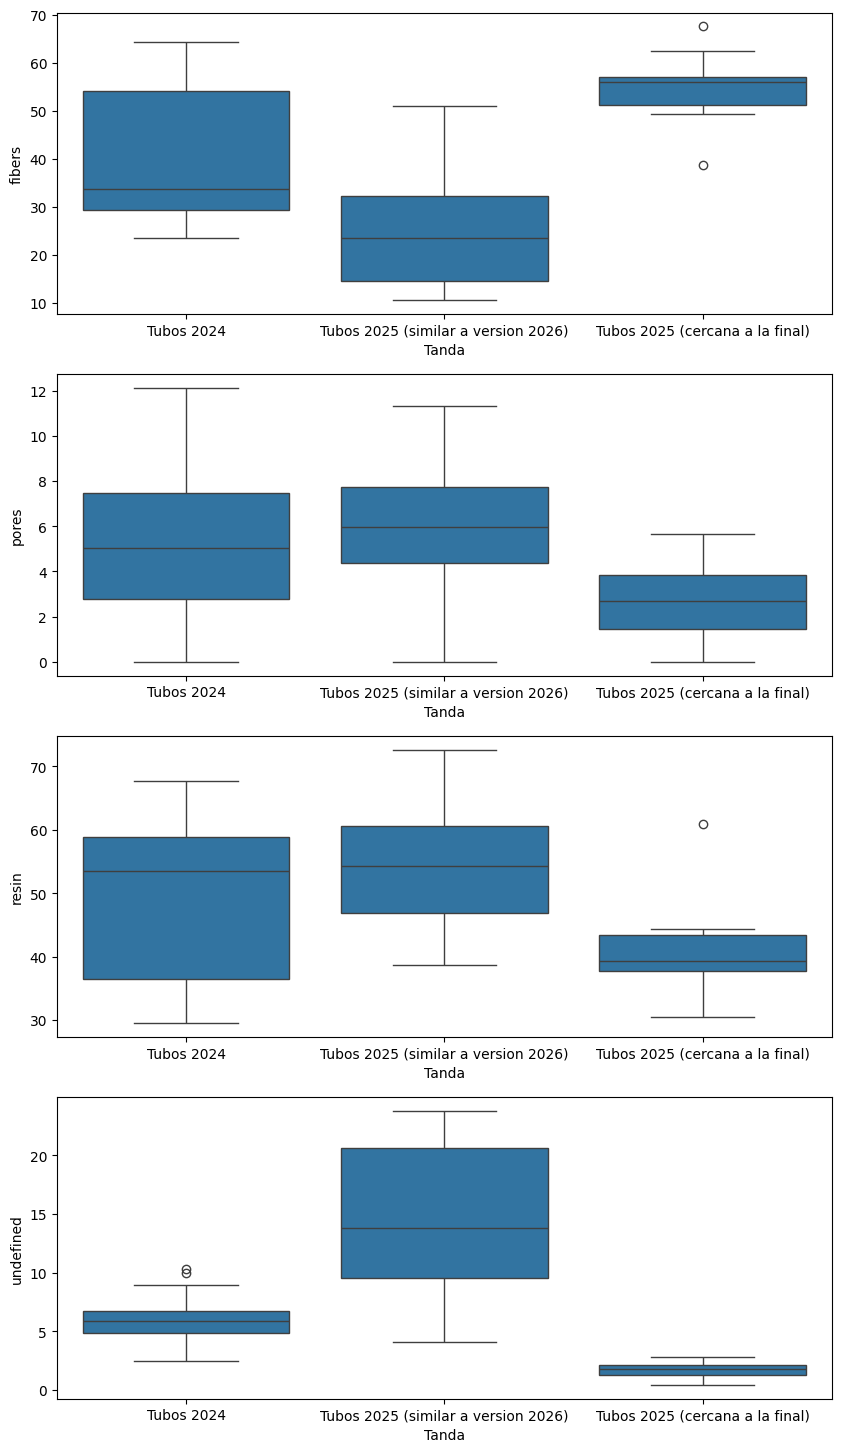

In [264]:
fig,ax = plt.subplots(4,1, figsize=(10,18))
sns.boxplot(x='Tanda', y='fibers', data=df, ax=ax[0])
sns.boxplot(x='Tanda', y='pores', data=df, ax=ax[1])
sns.boxplot(x='Tanda', y='resin', data=df, ax=ax[2])
sns.boxplot(x='Tanda', y='undefined', data=df, ax=ax[3])
plt.show()

In [ ]:
# Vemos que:
# - En fibra: tubos 2024 y 2025 simil 26 (mediana mas baja), mucha variabilidad; tubos 2025 final mediana mucho mas alta
# - En poros: 2025 final, la mejor (mas baja)
# - En resina: 2024 variabilidad, 2025 simil 26 con mediana muy parecida a 2024 y 2025 final la mejor (la mas baja)
# - En indefinido: en 2024 poco, en 2025 simil 26 mucho y mucha variabilidad, en 2025 final casi cero

- Comparacion de porcentajes de componente 'fibres' entre tandas con cada escala de observacion

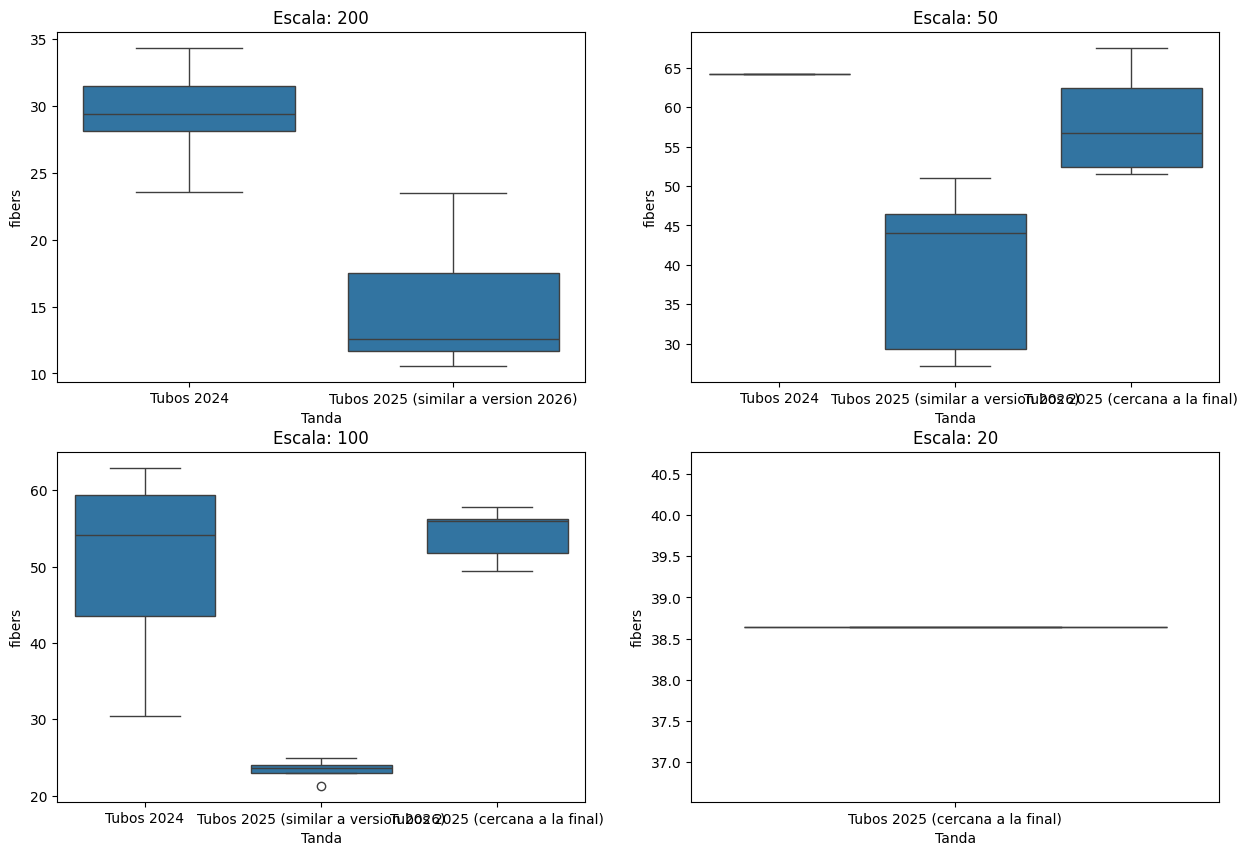

In [311]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
vals_unicos_escala = df['Escala (micrones)'].unique() # Son 4 valores
cont=0
for i in range(len(vals_unicos_escala)):
  if cont<2:
    sns.boxplot(x='Tanda', y='fibers', data=df[df['Escala (micrones)']==vals_unicos_escala[i]], ax=ax[0,cont])
    ax[0,cont].set_title(f'Escala: {vals_unicos_escala[i]}')

  else:
    sns.boxplot(x='Tanda', y='fibers', data=df[df['Escala (micrones)']==vals_unicos_escala[i]], ax=ax[1,cont-2])
    ax[1,cont-2].set_title(f'Escala: {vals_unicos_escala[i]}')
  cont+=1
plt.show()

# En escala 50, no contar a tubo 2024
# Escala 20 la desestimamos por tener un solo valor

Evaluamos lo mismo de antes pero en un solo grafico y quitando los casos aislados que no nos interesan (por eso esta filtrado el df)

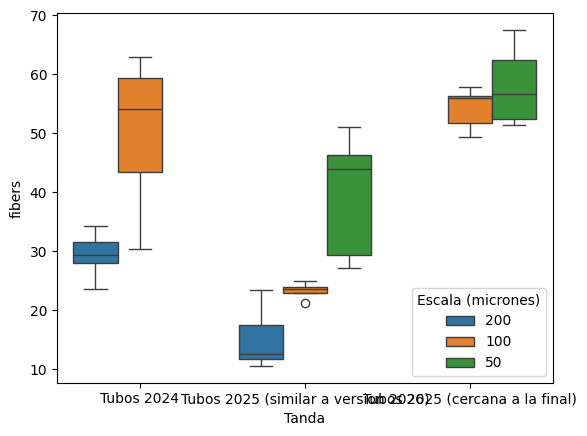

In [314]:
sns.boxplot(x='Tanda', y='fibers', data=df[(df['Escala (micrones)']!='20') & ~((df['Escala (micrones)']=='50') & (df['Tanda']=='Tubos 2024'))], hue='Escala (micrones)')
plt.show()

Hacemos lo mismo pero para poros, resina e indefinido

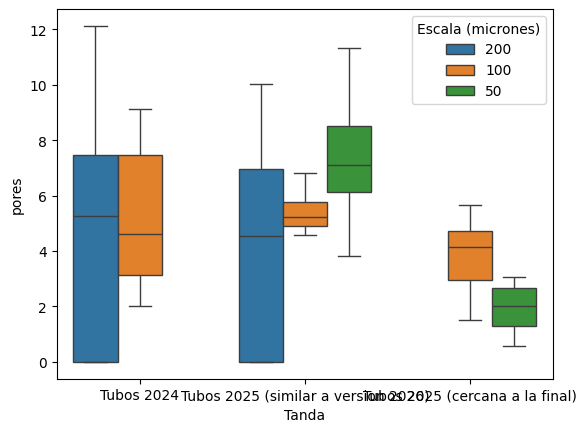

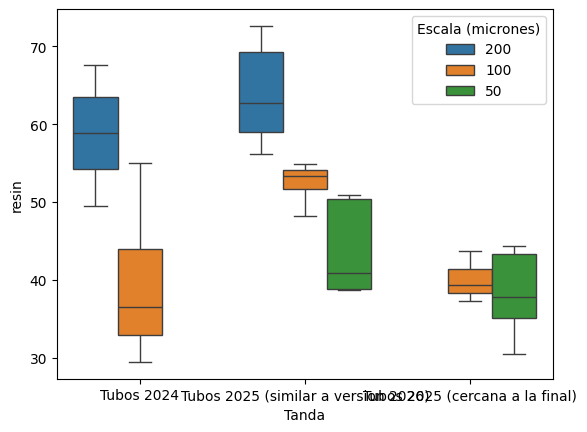

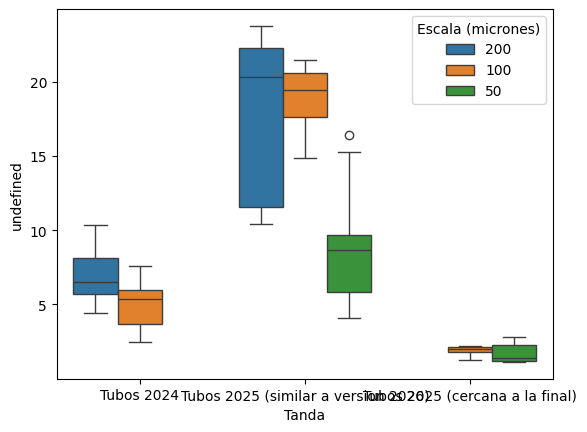

In [316]:
for comp in ['pores', 'resin', 'undefined']:
  sns.boxplot(x='Tanda', y=comp, data=df[(df['Escala (micrones)']!='20') & ~((df['Escala (micrones)']=='50') & (df['Tanda']=='Tubos 2024'))], hue='Escala (micrones)')
  plt.show()

**Se confirman los analisis del sumarizado cuando dividmos por escala**

Analisis por tanda y escala

In [318]:
df.groupby(['Tanda','Escala (micrones)'])['fibers'].describe()

count       mean  \
Tanda                               Escala (micrones)                     
Tubos 2024                          100                 22.0  50.783321   
                                    200                 24.0  29.536089   
                                    50                   1.0  64.227527   
Tubos 2025 (cercana a la final)     100                  6.0  54.344546   
                                    20                   1.0  38.644531   
                                    50                   5.0  58.108671   
Tubos 2025 (similar a version 2026) 100                  4.0  23.326739   
                                    200                 11.0  14.976637   
                                    50                   9.0  39.950333   

                                                             std        min  \
Tanda                               Escala (micrones)                         
Tubos 2024                          100                10.402884  30.381076   
                                    200                 2.754654  23.578655   
                                    50                       NaN  64.227527   
Tubos 2025 (cercana a la final)     100                 3.482349  49.414304   
                                    20                       NaN  38.644531   
                                    50                  6.814598  51.475116   
Tubos 2025 (similar a version 2026) 100                 1.512675  21.271557   
                                    200                 4.395553  10.572772   
                                    50                  9.225901  27.198351   

                                                             25%        50%  \
Tanda                               Escala (micrones)                         
Tubos 2024                          100                43.487269  54.141324   
                                    200                28.105095  29.351249   
                                    50                 64.227527  64.227527   
Tubos 2025 (cercana a la final)     100                51.830150  56.014829   
                                    20                 38.644531  38.644531   
                                    50                 52.405237  56.736304   
Tubos 2025 (similar a version 2026) 100                22.916450  23.561994   
                                    200                11.675082  12.580199   
                                    50                 29.307002  44.010031   

                                                             75%        max  
Tanda                               Escala (micrones)                        
Tubos 2024                          100                59.328173  62.970583  
                                    200                31.503267  34.344522  
                                    50                 64.227527  64.227527  
Tubos 2025 (cercana a la final)     100                56.301758  57.790654  
                                    20                 38.644531  38.644531  
                                    50                 62.378279  67.548418  
Tubos 2025 (similar a version 2026) 100                23.972283  24.911410  
                                    200                17.482422  23.491898  
                                    50                 46.387780  51.032890

In [319]:
df.groupby(['Tanda','Escala (micrones)'])['pores'].describe()

count      mean  \
Tanda                               Escala (micrones)                    
Tubos 2024                          100                 22.0  5.130949   
                                    200                 24.0  4.791209   
                                    50                   1.0  1.867573   
Tubos 2025 (cercana a la final)     100                  6.0  3.821406   
                                    20                   1.0  0.002411   
                                    50                   5.0  1.919531   
Tubos 2025 (similar a version 2026) 100                  4.0  5.460190   
                                    200                 11.0  3.839340   
                                    50                   9.0  7.469479   

                                                            std       min  \
Tanda                               Escala (micrones)                       
Tubos 2024                          100                2.365597  2.008247   
                                    200                3.662260  0.000000   
                                    50                      NaN  1.867573   
Tubos 2025 (cercana a la final)     100                1.522733  1.500193   
                                    20                      NaN  0.002411   
                                    50                 1.008378  0.573447   
Tubos 2025 (similar a version 2026) 100                0.962563  4.581067   
                                    200                3.921608  0.000000   
                                    50                 2.556051  3.820505   

                                                            25%       50%  \
Tanda                               Escala (micrones)                       
Tubos 2024                          100                3.131293  4.628159   
                                    200                0.000000  5.266686   
                                    50                 1.867573  1.867573   
Tubos 2025 (cercana a la final)     100                2.959949  4.138961   
                                    20                 0.002411  0.002411   
                                    50                 1.291184  2.009983   
Tubos 2025 (similar a version 2026) 100                4.914038  5.225911   
                                    200                0.000000  4.557340   
                                    50                 6.132234  7.098814   

                                                            75%        max  
Tanda                               Escala (micrones)                       
Tubos 2024                          100                7.465193   9.120949  
                                    200                7.459021  12.119695  
                                    50                 1.867573   1.867573  
Tubos 2025 (cercana a la final)     100                4.725453   5.662423  
                                    20                 0.002411   0.002411  
                                    50                 2.664448   3.058594  
Tubos 2025 (similar a version 2026) 100                5.772063   6.807870  
                                    200                6.963059  10.042101  
                                    50                 8.502508  11.336468

Estadisticos de fibra -tomar con cuidado-

In [ ]:
df.groupby('Tanda')['fibers'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,40.219718,13.365964,23.578655,29.351249,33.776427,54.141324,64.227527
Tubos 2025 (cercana a la final),12.0,54.604597,7.153581,38.644531,51.229685,56.014829,56.999891,67.548418
Tubos 2025 (similar a version 2026),24.0,25.733457,13.181109,10.572772,14.684980,23.478323,32.208406,51.032890


Estadisticos de poros -tomar con cuidado-

In [ ]:
df.groupby('Tanda')['pores'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,4.888031,3.080947,0.000000,2.786965,5.026331,7.455946,12.119695
Tubos 2025 (cercana a la final),12.0,2.710708,1.745838,0.002411,1.447941,2.711444,3.851719,5.662423
Tubos 2025 (similar a version 2026),24.0,5.470784,3.451956,0.000000,4.373131,5.989077,7.754196,11.336468


### **Test de hipotesis**

ANOVA entre medias de fibras por tandas. Hay diferencias entre las medias de todas las tandas para fibras

In [323]:
# ANOVA para medias de fibra por tandas, para comprobar que difieren
tanda1 = df['fibers'][df['Tanda']=='Tubos 2024']
tanda2 = df['fibers'][df['Tanda']=='Tubos 2025 (similar a version 2026)']
tanda3 = df['fibers'][df['Tanda']=='Tubos 2025 (cercana a la final)']

anova_tandas = stats.f_oneway(tanda1, tanda2, tanda3)
print(f'P-valor: {anova_tandas.pvalue}')

In [328]:
import scikit_posthocs as sp
tukey_results = sp.posthoc_tukey(df, val_col='fibers', group_col='Tanda')
print("Tukey HSD Post-Hoc Test Results for 'fibers' by 'Tanda':")
print(tukey_results)

Tukey HSD Post-Hoc Test Results for 'fibers' by 'Tanda':
                                     Tubos 2024  \
Tubos 2024                             1.000000   
Tubos 2025 (similar a version 2026)    0.000052   
Tubos 2025 (cercana a la final)        0.002051   

                                     Tubos 2025 (similar a version 2026)  \
Tubos 2024                                                  5.187929e-05   
Tubos 2025 (similar a version 2026)                         1.000000e+00   
Tubos 2025 (cercana a la final)                             2.250303e-08   

                                     Tubos 2025 (cercana a la final)  
Tubos 2024                                              2.051252e-03  
Tubos 2025 (similar a version 2026)                     2.250303e-08  
Tubos 2025 (cercana a la final)                         1.000000e+00  


ANOVA entre medias de poros por tandas. Solo son significativas las diferencias entre el tubo 2025 version final con respecto al tubo 2024 (considerando umbral de significancia: $\alpha$=0.1) y tubo 2025 simil 26 (tomando el $\alpha$ comun de $\alpha$=0.05)

In [337]:
# ANOVA para medias de poros por tandas, para comprobar que difieren
variable = 'pores'
tanda1 = df[variable][df['Tanda']=='Tubos 2024']
tanda2 = df[variable][df['Tanda']=='Tubos 2025 (similar a version 2026)']
tanda3 = df[variable][df['Tanda']=='Tubos 2025 (cercana a la final)']

anova_tandas = stats.f_oneway(tanda1, tanda2, tanda3)
print(f'P-valor: {anova_tandas.pvalue}')

P-valor: 0.03826051722910596


In [338]:
tukey_results = sp.posthoc_tukey(df, val_col=variable, group_col='Tanda')
print(f"Tukey HSD Post-Hoc Test Results for {variable} by 'Tanda':")
print(tukey_results)

Tukey HSD Post-Hoc Test Results for pores by 'Tanda':
                                     Tubos 2024  \
Tubos 2024                             1.000000   
Tubos 2025 (similar a version 2026)    0.727541   
Tubos 2025 (cercana a la final)        0.076076   

                                     Tubos 2025 (similar a version 2026)  \
Tubos 2024                                                      0.727541   
Tubos 2025 (similar a version 2026)                             1.000000   
Tubos 2025 (cercana a la final)                                 0.032771   

                                     Tubos 2025 (cercana a la final)  
Tubos 2024                                                  0.076076  
Tubos 2025 (similar a version 2026)                         0.032771  
Tubos 2025 (cercana a la final)                             1.000000  


ANOVA entre medias de resina por tandas. Solo son significativas las diferencias entre el tubo 2025 version final con respecto al tubo 2024 (considerando umbral de significancia: $\alpha$=0.1) y tubo 2025 simil 26 (tomando el $\alpha$ comun de $\alpha$=0.05)

In [342]:
# ANOVA para medias de resina por tandas, para comprobar que difieren
variable = 'resin'
tanda1 = df[variable][df['Tanda']=='Tubos 2024']
tanda2 = df[variable][df['Tanda']=='Tubos 2025 (similar a version 2026)']
tanda3 = df[variable][df['Tanda']=='Tubos 2025 (cercana a la final)']

anova_tandas = stats.f_oneway(tanda1, tanda2, tanda3)
print(f'P-valor: {anova_tandas.pvalue}')

P-valor: 0.004639495500740729


In [343]:
tukey_results = sp.posthoc_tukey(df, val_col=variable, group_col='Tanda')
print(f"Tukey HSD Post-Hoc Test Results for {variable} by 'Tanda':")
print(tukey_results)

Tukey HSD Post-Hoc Test Results for resin by 'Tanda':
                                     Tubos 2024  \
Tubos 2024                             1.000000   
Tubos 2025 (similar a version 2026)    0.143505   
Tubos 2025 (cercana a la final)        0.076115   

                                     Tubos 2025 (similar a version 2026)  \
Tubos 2024                                                      0.143505   
Tubos 2025 (similar a version 2026)                             1.000000   
Tubos 2025 (cercana a la final)                                 0.003273   

                                     Tubos 2025 (cercana a la final)  
Tubos 2024                                                  0.076115  
Tubos 2025 (similar a version 2026)                         0.003273  
Tubos 2025 (cercana a la final)                             1.000000  


## Analisis Aletas

In [ ]:
df_aletas = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results_aletas.csv',index_col=0)

In [ ]:
escala_aletas = limpieza_txt_escala('/content/Escala_micrones_aletas.txt')

In [ ]:
df_aletas['Experimento'] = df_aletas['Image Paths'].apply(lambda x: x[x.rfind('-')+1:x.rfind('.')])

In [ ]:
df_aletas = df_aletas.merge(escala_aletas, on='Experimento', how='inner')

In [ ]:
df_aletas.shape[0], escala_aletas.shape[0]

(17, 17)

In [332]:
df_aletas.head()

,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda,Experimento,Escala (micrones)
0,/content/drive/MyDrive/Micrografía Aletas FC ...,7.981626,11.468364,76.308497,4.241512,100.0,Aletas 1,872,200
1,/content/drive/MyDrive/Micrografía Aletas FC ...,8.116898,48.704282,40.764082,2.414738,100.0,Aletas 1,873,50
2,/content/drive/MyDrive/Micrografía Aletas FC ...,21.382812,51.529610,24.885610,2.201968,100.0,Aletas 1,874,20
3,/content/drive/MyDrive/Micrografía Aletas FC ...,9.922743,7.209201,76.243200,6.624855,100.0,Aletas 1,878,200
4,/content/drive/MyDrive/Micrografía Aletas FC ...,9.658372,9.103202,74.875289,6.363137,100.0,Aletas 1,879,200


In [336]:
df_aletas.groupby(['Tanda','Escala (micrones)'])['Experimento'].count()

Tanda     Escala (micrones)
Aletas 1  10                   2
          20                   7
          200                  5
          50                   3
Name: Experimento, dtype: int64

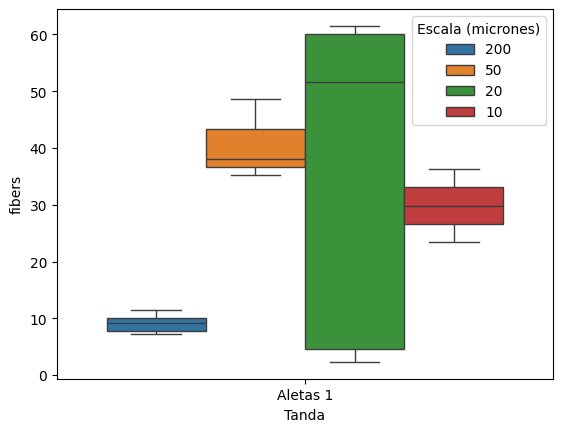

In [333]:
sns.boxplot(x='Tanda', y='fibers', data=df_aletas, hue='Escala (micrones)')
plt.show()

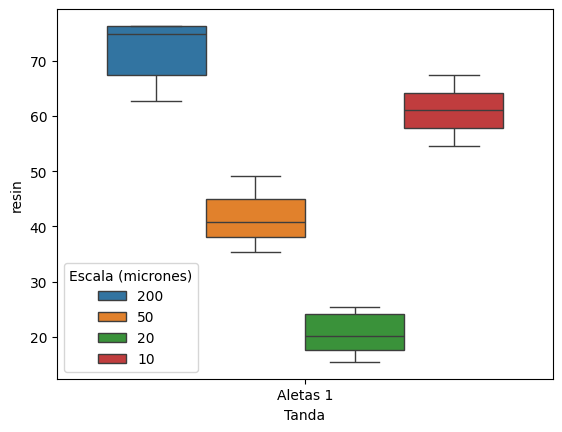

In [344]:
sns.boxplot(x='Tanda', y='resin', data=df_aletas, hue='Escala (micrones)')
plt.show()

Definitivamente, para imagenes de 200 micrones pareciera fallar

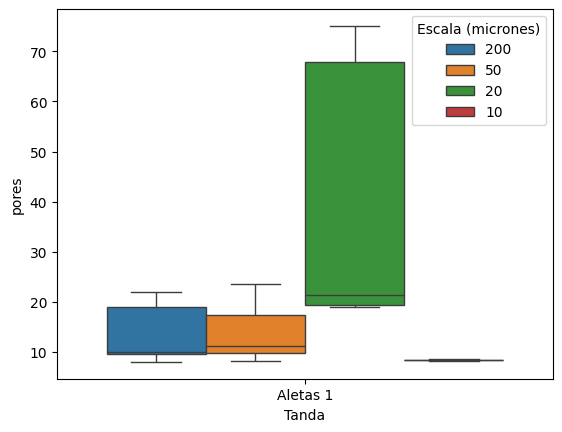

In [345]:
sns.boxplot(x='Tanda', y='pores', data=df_aletas, hue='Escala (micrones)')
plt.show()

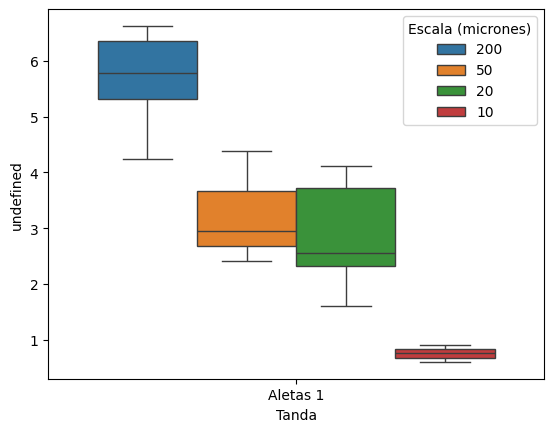

In [346]:
sns.boxplot(x='Tanda', y='undefined', data=df_aletas, hue='Escala (micrones)')
plt.show()